In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.utils import plot_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
fashion_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

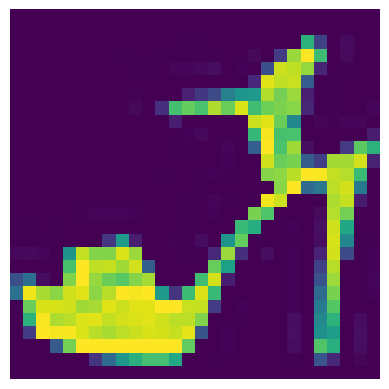

In [4]:
plt.imshow(train_images[9])
plt.grid(False)
plt.axis('off')
plt.show()

In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
df = pd.DataFrame(np.unique(train_labels,return_counts=True)).T

In [7]:
df.rename(columns={0:'class',1:'count'},inplace=True)
df

,class,count
0,0,6000
1,1,6000
2,2,6000
3,3,6000
4,4,6000
5,5,6000
6,6,6000
7,7,6000
8,8,6000
9,9,6000


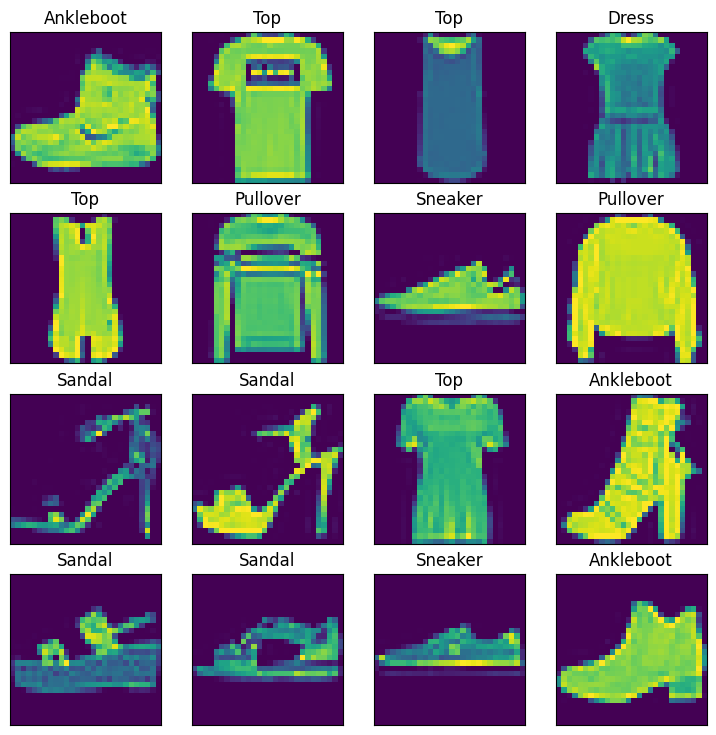

In [8]:
plt.figure(figsize=(9,9))

for i in range (16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i]])

plt.show()

In [9]:
#normalization of data
train_images = train_images/255.0
test_images = test_images/255.0

In [10]:
model_1 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(train_images, train_labels, epochs=5, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7582 - loss: 0.6974 - val_accuracy: 0.8432 - val_loss: 0.4376
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8514 - loss: 0.4224 - val_accuracy: 0.8602 - val_loss: 0.4005
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8677 - loss: 0.3711 - val_accuracy: 0.8574 - val_loss: 0.3944
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8786 - loss: 0.3406 - val_accuracy: 0.8670 - val_loss: 0.3779
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8815 - loss: 0.3201 - val_accuracy: 0.8763 - val_loss: 0.3505


In [11]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,672 (596.38 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,782 (397.59 KB)

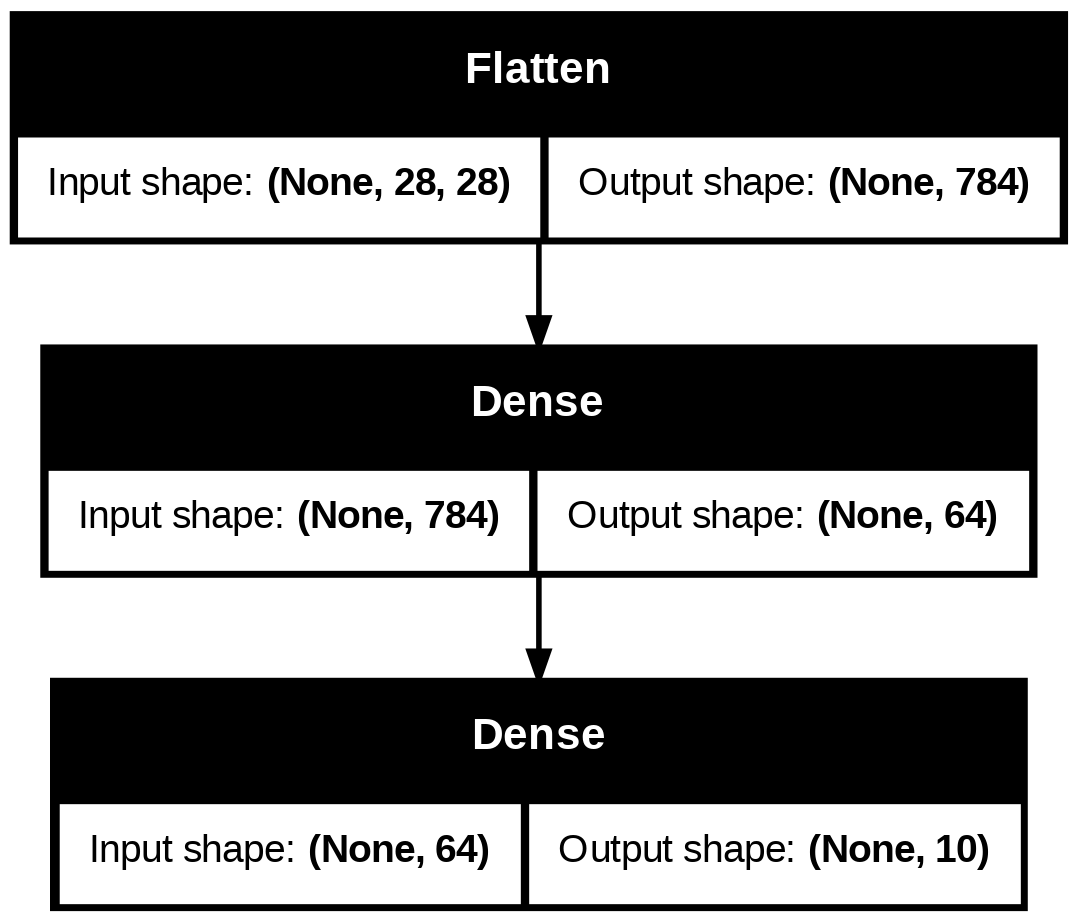

In [12]:
plot_model(model_1, show_shapes=True)

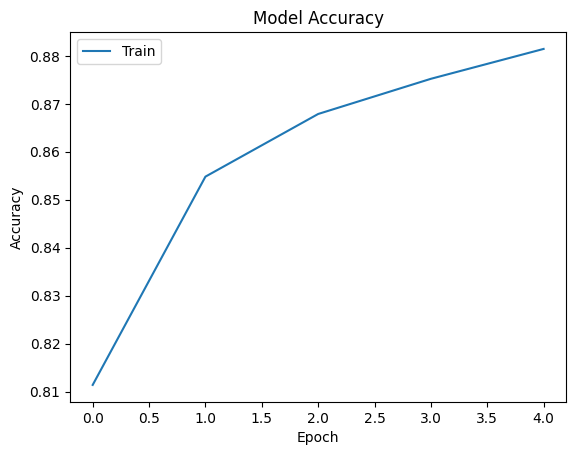

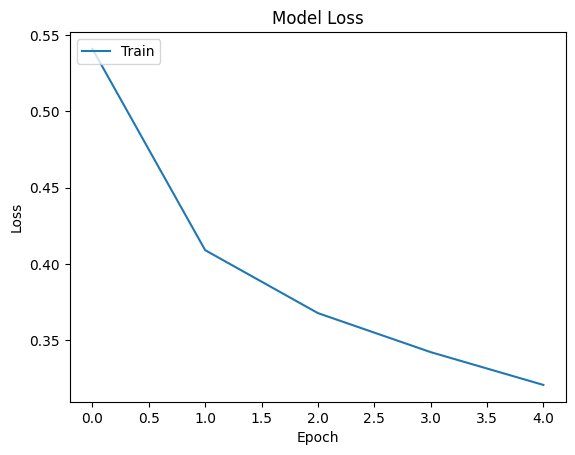

In [13]:
#plot for accuracy
plt.plot(history_1.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

#plot for loss
plt.plot(history_1.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [14]:
test_loss, test_accuracy = model_1.evaluate(test_images,test_labels)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.3671
Test Accuracy: 0.8648999929428101
Test Loss: 0.3723774552345276


In [15]:
prediction = model_1.predict(test_images)
prediction[0].round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
      dtype=float32)

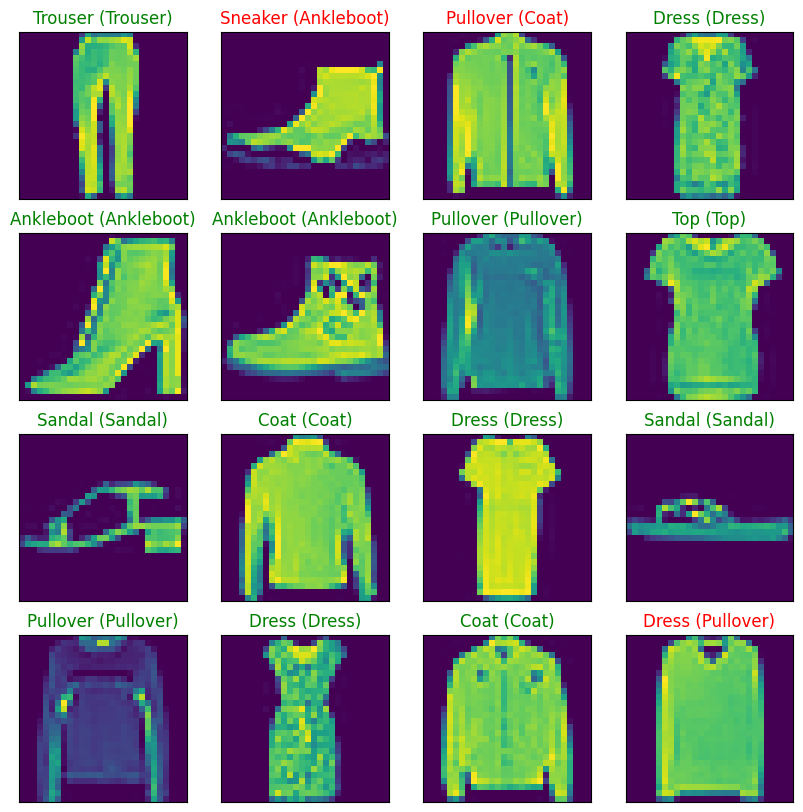

In [16]:
figure = plt.figure(figsize=(10,10))

for i, index in enumerate(np.random.choice(test_images.shape[0],size=16,replace=False)):
  ax = figure.add_subplot(4,4,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(test_images[index]))
  predict_index = np.argmax(prediction[index])
  true_index = test_labels[index]
  ax.set_title(f'{class_names[predict_index]} ({class_names[true_index]})', color='green' if predict_index == true_index else 'red')

plt.show()

# Improving model accuracy

1. Increasing the number of eopchs

In [17]:
model_2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(train_images, train_labels, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7759 - loss: 0.6538
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8571 - loss: 0.4019
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8706 - loss: 0.3587
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8799 - loss: 0.3271
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8855 - loss: 0.3143
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8937 - loss: 0.2881
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8965 - loss: 0.2823
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9000 - loss: 0.2715
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9034 - loss: 0.2613
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9059 - loss: 0.2552
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9086 - loss: 0.2493
Epoch 12/50
1875/1875 ━━━━━━━━

In [20]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8772 - loss: 0.4559
Test Accuracy: 0.8779000043869019
Test Loss: 0.45809638500213623


In [18]:
# Adding callbacks to avoid overfitting of data with EarlyStopping with built-in callbacks
from tensorflow.keras.callbacks import EarlyStopping

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model_3 = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[callbacks])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7598 - loss: 0.7062 - val_accuracy: 0.8438 - val_loss: 0.4458
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8526 - loss: 0.4161 - val_accuracy: 0.8619 - val_loss: 0.3939
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8646 - loss: 0.3734 - val_accuracy: 0.8705 - val_loss: 0.3715
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8748 - loss: 0.3488 - val_accuracy: 0.8720 - val_loss: 0.3576
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8823 - loss: 0.3262 - val_accuracy: 0.8752 - val_loss: 0.3473
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8851 - loss: 0.3102 - val_accuracy: 0.8737 - val_loss: 0.3557
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8944 - loss: 0.2893 - val_accuracy: 0.8742 - val_loss: 0.3559
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8943 - loss: 0.2853 - 

In [21]:
test_loss, test_acc = model_3.evaluate(test_images,test_labels)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8759 - loss: 0.3415
Test Accuracy: 0.8745999932289124
Test Loss: 0.34598684310913086


In [23]:
# Earlystopping with custom callbacks
class EarlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85):
      print("\n Validation accuracy has been reached. ")
      self.model.stop_training = True

callback = EarlyStop()

In [24]:
model_4 = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_4 = model_4.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7506 - loss: 0.7179 - val_accuracy: 0.8470 - val_loss: 0.4377
Epoch 2/50
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.4114
 Validation accuracy has been reached. 
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8559 - loss: 0.4114 - val_accuracy: 0.8592 - val_loss: 0.4001


# Adding Neurons in the Hidden Layer

In [30]:
#Let us create a function for model

def hidden_neurons(hidden_neuron, optimizer, train_images, train_labels, validation_split=0.2, callbacks=False, epochs=100):
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(hidden_neuron, activation='relu'),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=epochs, validation_split=validation_split, callbacks=[callbacks])

  return model, history

In [27]:
neuron_values=[1,500]
for neuron in neuron_values:
  model, history = hidden_neurons(neuron, train_images, train_labels, callbacks=callbacks)
  print(f"trained model with {neuron} in the hidden the layers")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0997 - loss: 2.3032 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.1013 - val_loss: 2.3027
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3030
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
trained model with 1 in the hidden the layers
Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7840 - loss: 0.6131 - val_accuracy: 0.8366 - val_loss: 0.4307
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8637 - loss: 0

# Changing the optimizer

In [31]:
model_sgd, history_sgd = hidden_neurons(64, 'sgd', train_images, train_labels, callbacks=callbacks, epochs=50)
model_adam, history_adam = hidden_neurons(64,'adam', train_images, train_labels, callbacks=callbacks, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6295 - loss: 1.1405 - val_accuracy: 0.7981 - val_loss: 0.5890
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8111 - loss: 0.5638 - val_accuracy: 0.8158 - val_loss: 0.5366
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8252 - loss: 0.5076 - val_accuracy: 0.8207 - val_loss: 0.5018
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8366 - loss: 0.4716 - val_accuracy: 0.8359 - val_loss: 0.4632
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8402 - loss: 0.4518 - val_accuracy: 0.8413 - val_loss: 0.4539
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7578 - loss: 0.7077 - val_accuracy: 0.8397 - val_loss: 0.4509
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8497 - loss: 0.4217 - val_accuracy: 0.8597 - val_loss: 0.4002
Epoch 3

# Changing the learning rate

In [33]:
def learning_test(train_images, train_labels, test_images, test_labels, learning_rate=0.01,):
  model = Sequential([
      Flatten(input_shape=(28,28)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[callbacks])

  score = model.evaluate(test_images, test_labels)

  return score

In [34]:
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]

for l in learning_rates:
  scores = learning_test(train_images, train_labels, test_images, test_labels, learning_rate=l)
  print(f"Test Loss: {scores[0]} and Test Accuracy: {scores[1]} for learning rate {l}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5062 - loss: 2.2080 - val_accuracy: 0.4098 - val_loss: 1.6112
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4345 - loss: 1.5244 - val_accuracy: 0.4150 - val_loss: 1.4641
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3549 - loss: 1.6281 - val_accuracy: 0.2803 - val_loss: 1.7473
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2939 - loss: 1.7070 - val_accuracy: 0.3530 - val_loss: 1.9008
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3719 - loss: 1.5564 - val_accuracy: 0.3605 - val_loss: 1.4721
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4115 - loss: 1.6662
Test Loss: 1.644879937171936 and Test Accuracy: 0.40700000524520874 for learning rate 0.1
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7630 - loss: 0.6760 - val_accuracy